In [1]:
from drop_lib2 import *
from scipy.io import loadmat
import pickle
from sklearn.ensemble import HistGradientBoostingClassifier
from kymatio.numpy import Scattering1D

directory = 'scattering_tr'
verbose = 1
data = load_data(verbose=verbose)

Loaded segments shape: (842, 25000)
Speed labels shape: (842,)
Volume labels shape: (842,)
Unique speeds: [1.72 2.08 2.36 2.64 3.13 3.39 3.42]
Unique volumes: [55 77]


In [2]:
# default parameters for scattering transform were found by hyperparameter optimization
def scattering_transform(segments=data['segments'], J=10, Q=8):
    """
    Apply scattering transform to the segments.

    Parameters:
    - segments: np.ndarray, shape (n_samples, n_features)
    - J: int, scale of scattering
    - Q: int, number of wavelets per octave

    Returns:
    - X_scatter: np.ndarray, shape (n_samples, n_features_transformed)
    """
    T = segments.shape[1]  # length of each segment
    scattering = Scattering1D(J=J, shape=T, Q=Q, max_order=2)

    print(f'Scattering parameters: J={J}, Q={Q}, T={T}')

    # Extract scattering features for all segments
    X_scatter = np.stack([scattering(x) for x in tqdm(segments, desc='Scattering transform')])
    return X_scatter.reshape(X_scatter.shape[0], -1)

X = scattering_transform()

Scattering parameters: J=10, Q=8, T=25000


Scattering transform: 100%|██████████| 842/842 [03:13<00:00,  4.35it/s]


 20%|██        | 1/5 [02:46<11:05, 166.35s/it]

Velocity accuracy (fold): 0.9941


 40%|████      | 2/5 [05:31<08:17, 165.88s/it]

Velocity accuracy (fold): 0.9882


 60%|██████    | 3/5 [08:06<05:21, 160.82s/it]

Velocity accuracy (fold): 0.9524


 80%|████████  | 4/5 [10:40<02:38, 158.05s/it]

Velocity accuracy (fold): 0.9702


100%|██████████| 5/5 [13:25<00:00, 161.11s/it]


Velocity accuracy (fold): 0.9643
Velocity accuracy average across all folds: 0.9738±0.0154


 20%|██        | 1/5 [01:12<04:49, 72.34s/it]

Volume accuracy (fold): 0.9527


 40%|████      | 2/5 [02:25<03:38, 72.97s/it]

Volume accuracy (fold): 0.9408


 60%|██████    | 3/5 [03:33<02:21, 70.56s/it]

Volume accuracy (fold): 0.9167


 80%|████████  | 4/5 [04:43<01:10, 70.42s/it]

Volume accuracy (fold): 0.9464


100%|██████████| 5/5 [05:54<00:00, 70.84s/it]

Volume accuracy (fold): 0.9643
Volume accuracy average across all folds - : 0.9442±0.0158
Results saved in directory: ./scattering_tr/
[[102   0   1   0   0   0   0]
 [  0 120   0   1   0   1   0]
 [  0   0 112   1   0   0   0]
 [  0   0   1 180   0   1   0]
 [  0   0   0   0  84   0   4]
 [  0   1   0   4   0 137   0]
 [  1   0   1   0   5   0  85]]
[[343  26]
 [ 21 452]]


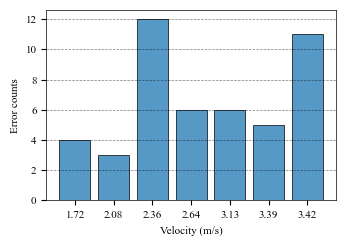

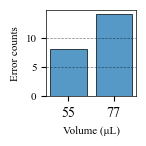

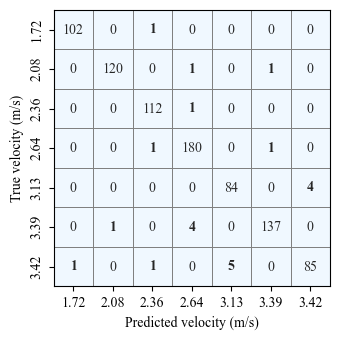

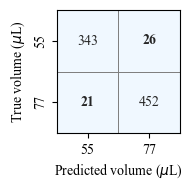

In [3]:
classifier = HistGradientBoostingClassifier(max_iter=250,
                                            random_state=42)
confusion_matrices_speed, error_indices_speed, all_cv_scores_speed, \
confusion_matrices_volume, error_indices_volume, all_cv_scores_volume\
    = evaluate_classifier(classifier, classifier, X, data, random_state=42)
save_results(confusion_matrices_speed, error_indices_speed, all_cv_scores_speed,
             confusion_matrices_volume, error_indices_volume, all_cv_scores_volume,
             data,
             directory=directory, verbose=verbose)
plot_results(confusion_matrices_speed, error_indices_speed,
             confusion_matrices_volume, error_indices_volume,
             data,
             directory=directory, verbose=verbose)